# Humpback Whale Identification 
## Kaggle competition
https://www.kaggle.com/c/humpback-whale-identification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
import pandas as pd

In [3]:
# bath size
bs = 16

In [4]:
# see what is in the data
path = Path('/home/tom/Data/data/whale/')
path.ls()

[PosixPath('/home/tom/Data/data/whale/train.csv'),
 PosixPath('/home/tom/Data/data/whale/test'),
 PosixPath('/home/tom/Data/data/whale/models'),
 PosixPath('/home/tom/Data/data/whale/sample_submission.csv'),
 PosixPath('/home/tom/Data/data/whale/train')]

In [5]:
labels = pd.read_csv(path/'train.csv')

In [6]:
labels.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [8]:
!ls {path/'train'} | head

0000e88ab.jpg
0001f9222.jpg
00029d126.jpg
00050a15a.jpg
0005c1ef8.jpg
0006e997e.jpg
000a6daec.jpg
000f0f2bf.jpg
0016b897a.jpg
001c1ac5f.jpg
ls: write error: Broken pipe


In [10]:
data = ImageDataBunch.from_csv(path=path, folder='train', csv_labels='train.csv', test='test', label_delim=',',
                               size=224, bs=bs, fn_col='Image', label_col='Id', valid_pct=0.2).normalize(imagenet_stats)

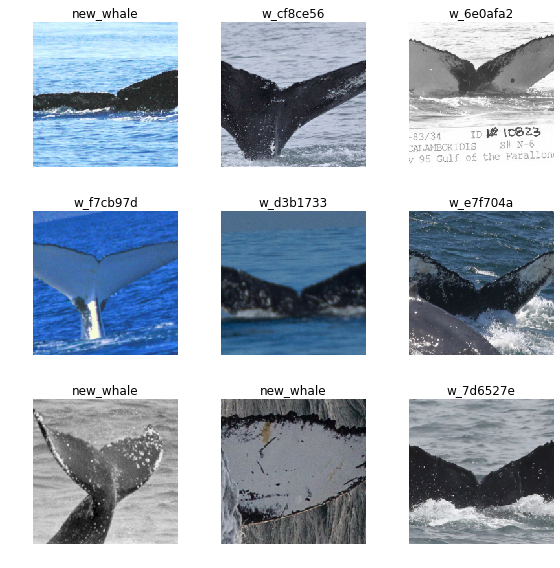

In [11]:
data.show_batch(rows=3, figsize=(8,8))

In [12]:
len(data.classes),data.c

(4511, 4511)

In [13]:
learn = create_cnn(data, models.resnet50)

In [14]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss
1,0.001514,0.001212
2,0.001484,0.001149
3,0.001386,0.001124


In [15]:
learn.save('stage-1')

## look at model 

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

In [17]:
len(data.valid_ds)==len(losses)==len(idxs)

False

IndexError: index 5768845 is out of bounds for axis 0 with size 5072

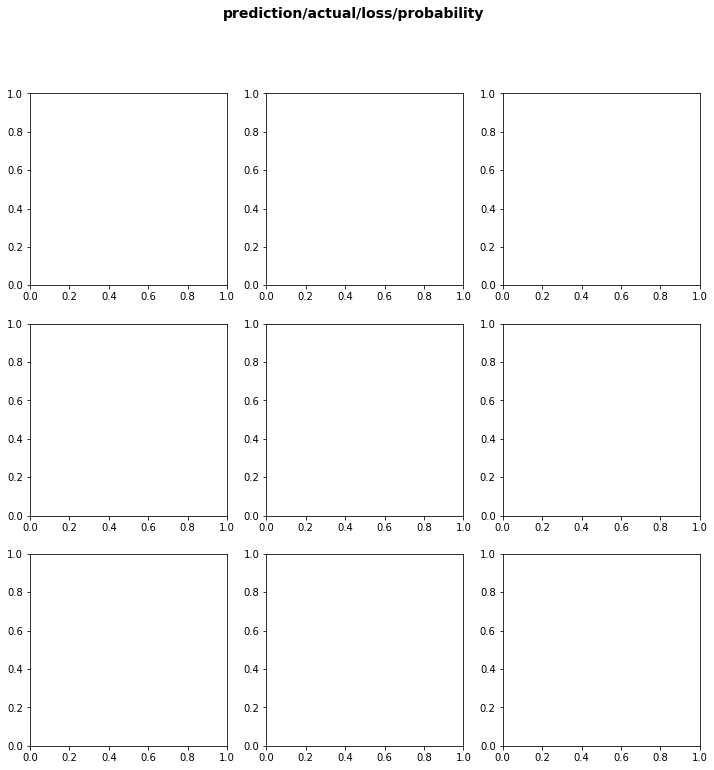

In [18]:
interp.plot_top_losses(9)

In [19]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

RuntimeError: Expected object of scalar type Float but got scalar type Long for argument #2 'other'